In [12]:
import torch
import torch.nn as nn #just needs to inti
import torch.nn.functional as f #needs a parameter
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import torchvision as tv 
from torchvision import transforms, datasets


train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

#test to see a batch of data and to see the what the images look like. 
'''
for data in trainset:
    print(data)
    break

x,y = data[0][0], data[1][0]
print(y)

plt.imshow(data[0][0].view(28,28))
plt.show()

'''

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #fc means fully connected layer
        #the 1 means the first layer
        #781 comes from the image's length * width (which is 28,28 in this case) 
        #64 is the number of neruons per layer 
        # (input, output)
        self.fc1 = nn.Linear(784,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)

    def forward(self, x):
        # relu = rectify linear - wheather the neroun is firing or not
        # spilts out a number 0-1
        x = f.relu(self.fc1(x)) 
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = self.fc4(x)
        #dim = 1 means which neroun do we want to be one or being fired/on
        return f.log_softmax(x, dim = 1) 


net = Net()
#print(net)

# a test to input a tensor though the network too see if it would run
''''
x = torch.rand(28,28)
x = x.view(-1,784) #-1 means the input is an unknown shape
output = net(x)
print(output)
'''
# net.parameter is everything that can be adjusted - weights asnd bais
# the overlord of the adjusted things and control center
# lr = learning rate to find the lowest point by finding a "step" to take 
# to find the lowest point, only small steps
optimizer = optim.Adam(net.parameters(),lr = 0.001)

# epoch is the number of times pass through the dataset
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        #X are the images
        #y are the labels
        X,y = data
        #before you pass data you need to do 
        #net.zero_grad()
        #helps to decrease traning time and helps to generalize the network
        net.zero_grad()
        output = net(X.view(-1,784))
        # two ways to calculate loss
        # way one is to use "one hot vector" the output is a vector
        # out puts a "one hot vector" meaning in the list there is only one of the vaule that is "on"
        # best to use one hot vector if the output is a spread
        loss = f.nll_loss(output, y)
        #this is used to back propagation to agjusts the weights being used
        loss.backward()
        # adjusts the weights for me
        optimizer.step()
    print (loss)

correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print ("Accuracy: ", round(correct/total, 3))

tensor(0.2285, grad_fn=<NllLossBackward0>)
tensor(0.0192, grad_fn=<NllLossBackward0>)
tensor(0.0511, grad_fn=<NllLossBackward0>)
Accuracy:  0.975


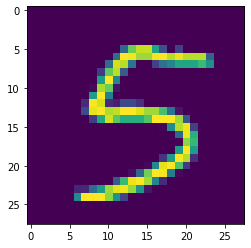

tensor(5)


In [25]:
plt.imshow(X[0].view(28,28))
plt.show()

print(torch.argmax(net(X[0].view(-1, 784))[0]))